In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Monthly Air Passengers from January 1949 to December 1960
df = pd.read_csv('../data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


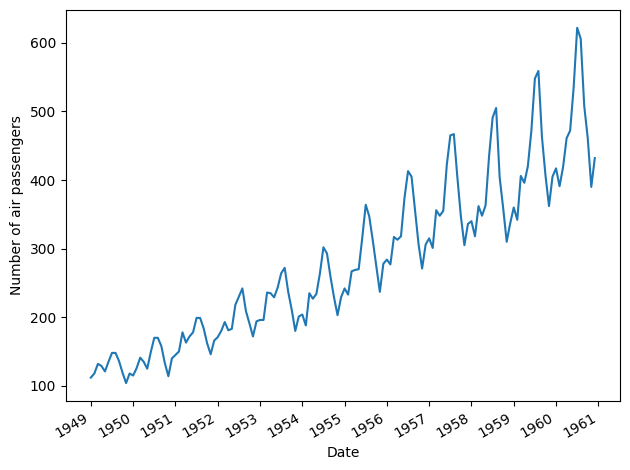

In [3]:
# Figure 8.1 in pg 157

fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F01_peixeiro.png', dpi=300)

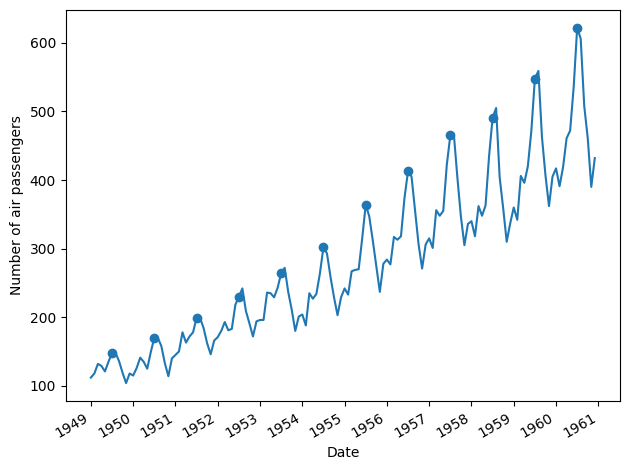

In [4]:
# Figure 8.2 in pg 159

fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'], markevery=np.arange(6, 145, 12), marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F02_peixeiro.png', dpi=300)

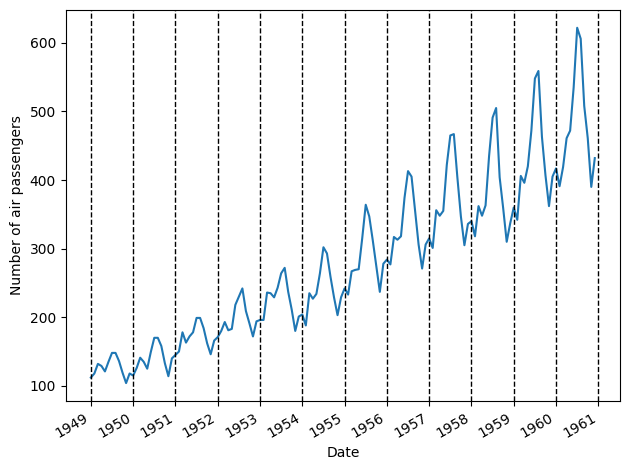

In [5]:
# Figure 8.3 in pg 160

fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F03_peixeiro.png', dpi=300)

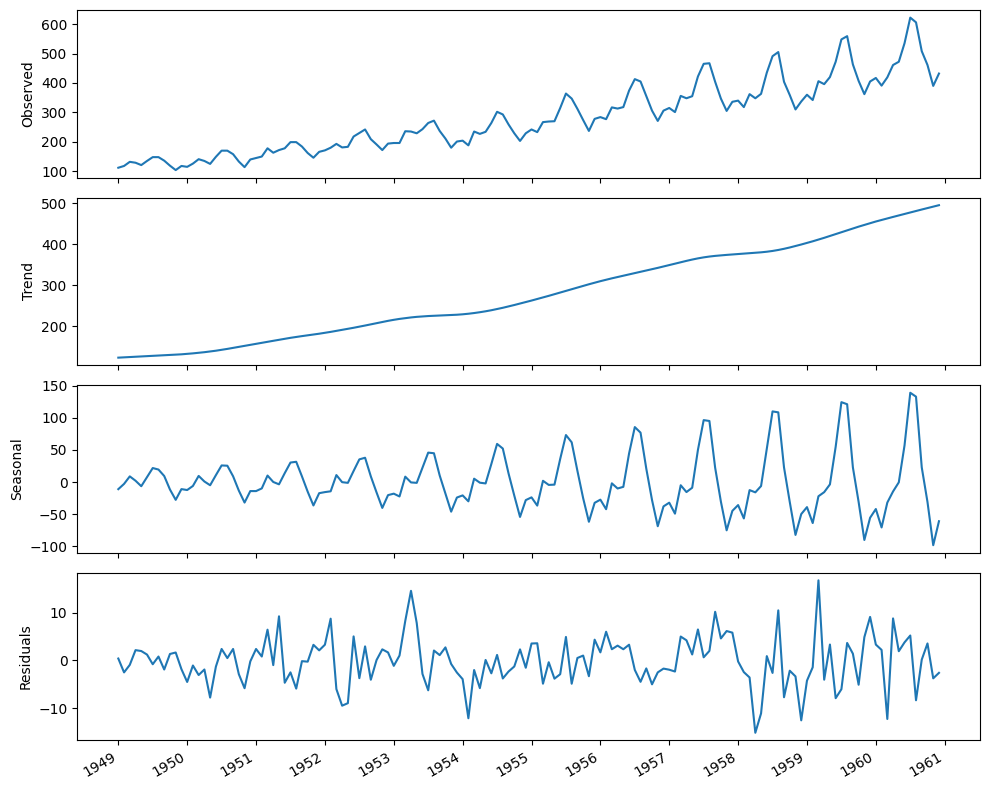

In [6]:
# Figure 8.4 in pg 162

decomposition = STL(df['Passengers'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F04_peixeiro.png', dpi=300)

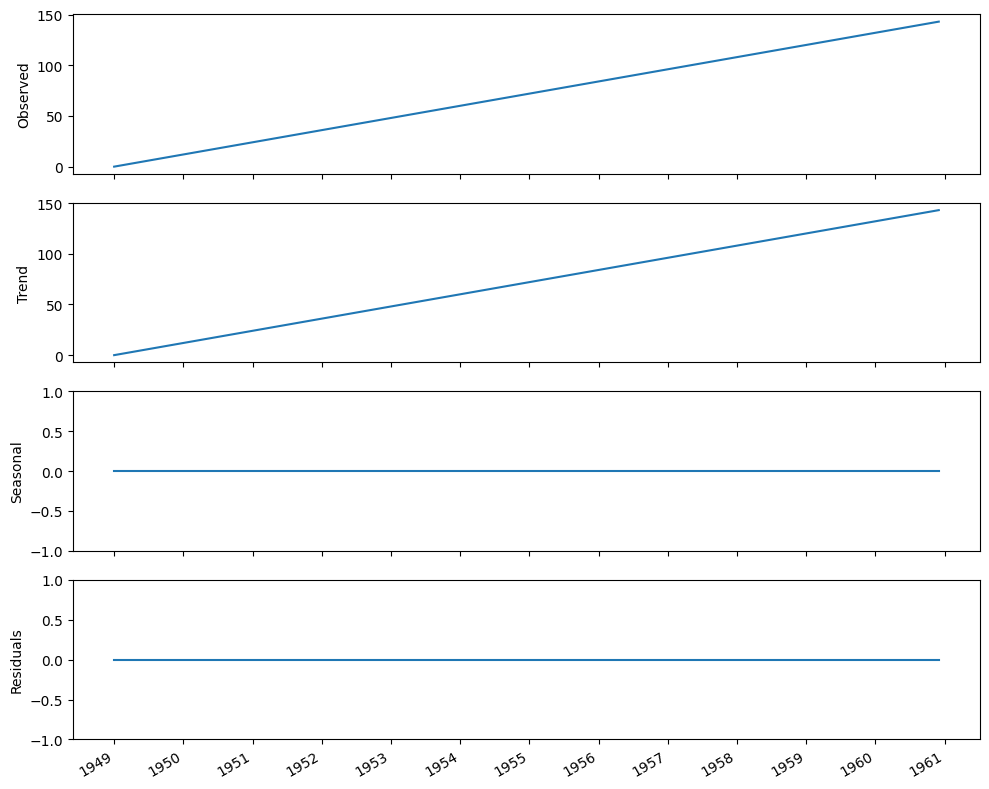

In [7]:
# Figure 8.5 in pg 163

linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F05_peixeiro.png', dpi=300)

### 8.3.1 Forecasting with an ARIMA(p,d,q) model

In [8]:
# Pg 165

ad_fuller_result = adfuller(df['Passengers'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060441
p-value: 0.9918802434376409


In [9]:
# Pg 165

df_diff = np.diff(df['Passengers'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241699968
p-value: 0.05421329028382589


In [10]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -16.38423154246854
p-value: 2.7328918500140445e-29


## d=2, D=0

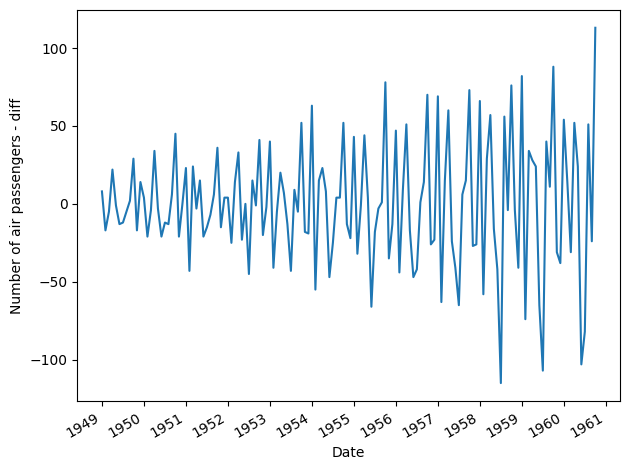

In [11]:
# Not in the book

fig, ax = plt.subplots()

#ax.plot(df['Month'][13:], eps_diff_seasonal_diff)
ax.plot(df['Month'][2:], df_diff2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers - diff')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

# plt.savefig('figures/CH07_F01_peixeiro.png', dpi=300)

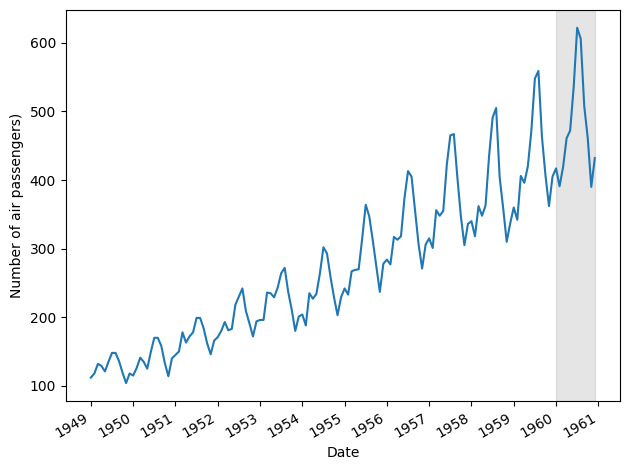

In [12]:
# Figure 8.8 in pg 167
# Code not in the book

fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers)')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F08_peixeiro.png', dpi=300)

In [13]:
# Not in the book

# def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
#     results = []
    
#     for order in tqdm_notebook(order_list):
#         try: 
#             model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
#         except:
#             continue
            
#         aic = model.aic
#         results.append([order, aic])
        
#     result_df = pd.DataFrame(results)
#     result_df.columns = ['(p,q)', 'AIC']
    
#     #Sort in ascending order, lower AIC is better
#     result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
#     return result_df

In [14]:
# Pg 168-169

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [15]:
# Pg 168-169

ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Passengers'][:-12]

# ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
# ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.845386
1,"(11, 4, 0, 0)",1019.035094
2,"(11, 5, 0, 0)",1020.377292
3,"(12, 0, 0, 0)",1020.385063
4,"(11, 1, 0, 0)",1021.031533
...,...,...
164,"(5, 0, 0, 0)",1281.732157
165,"(3, 0, 0, 0)",1300.282335
166,"(2, 0, 0, 0)",1302.913196
167,"(1, 0, 0, 0)",1308.152194


ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)   
        (p,q,P,Q)	AIC  
0	(11, 3, 0, 0)	1016.845386  
1	(11, 4, 0, 0)	1019.035094  
2	(11, 5, 0, 0)	1020.377292  
3	(12, 0, 0, 0)	1020.385063  
4	(11, 1, 0, 0)	1021.031533  
5	(11, 7, 0, 0)	1021.662836  
6	(12, 1, 0, 0)	1022.649255  
7	(11, 2, 0, 0)	1022.808059  
8	(11, 8, 0, 0)	1023.256813  
9	(12, 3, 0, 0)	1023.388460  
10	(11, 6, 0, 0)	1023.403796  
11	(12, 4, 0, 0)	1024.705577  
12	(12, 5, 0, 0)	1025.522137  
13	(12, 2, 0, 0)	1025.950370  
14	(11, 0, 0, 0)	1026.931453  
15	(11, 9, 0, 0)	1027.240041  
16	(11, 10, 0, 0)	1027.293564  
17	(12, 6, 0, 0)	1029.232209  
18	(12, 10, 0, 0)	1030.930996  
19	(10, 5, 0, 0)	1031.017759  

In [16]:
# Pg 169

ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:              SARIMAX(11, 2, 3)   Log Likelihood                -493.423
Date:                Thu, 12 Feb 2026   AIC                           1016.845
Time:                        12:22:16   BIC                           1059.858
Sample:                             0   HQIC                          1034.323
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8245      0.100     -8.230      0.000      -1.021      -0.628
ar.L2         -0.9626      0.049    -19.727      0.000      -1.058      -0.867
ar.L3         -0.8520      0.087     -9.762      0.0

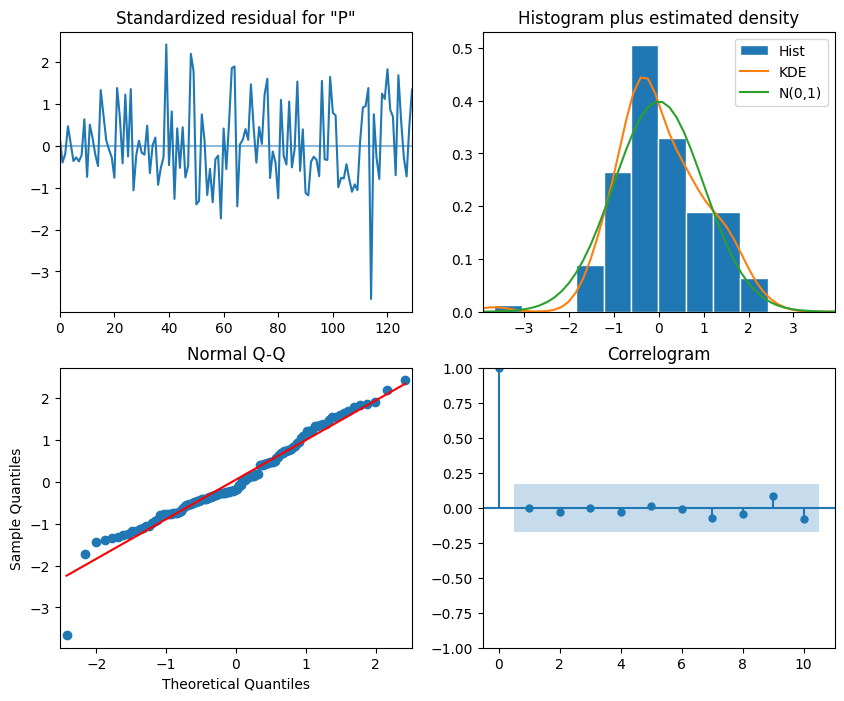

In [17]:
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH08_F09_peixeiro.png', dpi=300)

In [18]:
# DEPRECATED

# residuals = ARIMA_model_fit.resid

# lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

# print(pvalue)

In [19]:
residuals = ARIMA_model_fit.resid

lb_dataframe = acorr_ljungbox(residuals, np.arange(1, 11, 1))

lb_dataframe

,lb_stat,lb_pvalue
1,6.547351,0.010504
2,6.673433,0.035554
3,6.946075,0.073637
4,7.743062,0.101457
5,8.387760,0.136121
6,8.675856,0.192645
7,9.493658,0.219128
8,9.731375,0.284388
9,9.741430,0.371821
10,11.527968,0.317889


Pg 171  
The first two (2) values are not greater than 0.05. The model is not capturing all the information from the data. Still, we will use it as a baseline

In [20]:
# Pg 171

test = df.iloc[-12:]

test['naive_seasonal'] = df['Passengers'].iloc[120:132].values
test

,Month,Passengers,naive_seasonal
132,1960-01,417,360
133,1960-02,391,342
134,1960-03,419,406
135,1960-04,461,396
136,1960-05,472,420
137,1960-06,535,472
138,1960-07,622,548
139,1960-08,606,559
140,1960-09,508,463
141,1960-10,461,407


In [21]:
# Pg 171

ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Month,Passengers,naive_seasonal,ARIMA_pred
132,1960-01,417,360,422.296673
133,1960-02,391,342,410.648638
134,1960-03,419,406,461.831648
135,1960-04,461,396,457.747204
136,1960-05,472,420,481.624050
137,1960-06,535,472,530.982683
138,1960-07,622,548,606.129696
139,1960-08,606,559,615.429372
140,1960-09,508,463,525.641430
141,1960-10,461,407,467.170965


#### 8.3.2 Forecasting with a SARIMA(p,d,q)(P,D,Q)_m model

In [22]:
# Pg 172

ad_fuller_result = adfuller(df['Passengers'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060441
p-value: 0.9918802434376409


In [23]:
# Pg 172

df_diff = np.diff(df['Passengers'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
df_diff.std()

ADF Statistic: -2.8292668241699968
p-value: 0.05421329028382589


np.float64(33.63605251153669)

In [ ]:
# Pg 172

df_diff_seasonal_diff_test = np.diff(df_diff, n=12) # n=12 differences lag 1 12 consecutive times, instead:
# Panda Series
# df_diff_seasonal_diff = df_diff[12:].reset_index(drop=True) - df_diff[:-12] #type:pandas.core.series.Series 
# this differences once lag 12, which is what we want, or
# Numpy Array
df_diff_seasonal_diff = df_diff[12:].values - df_diff[:-12].values # type:numpy.ndarray # this also differences once lag 12, which is what we want


ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

print(df_diff_seasonal_diff_test.std(), df_diff_seasonal_diff.std())

ADF Statistic: -15.595618083746334
p-value: 1.8565116001234708e-28


np.float64(12.3094958235828)

## d=1, D=1

In [25]:
# Pg 174

ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Passengers'][:-12]

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(2, 1, 1, 2)",892.250598
1,"(2, 1, 2, 1)",893.685039
2,"(2, 1, 1, 3)",894.091230
3,"(1, 0, 1, 2)",894.285676
4,"(0, 1, 1, 2)",894.992519
...,...,...
249,"(0, 0, 2, 0)",906.940147
250,"(3, 2, 0, 3)",907.181875
251,"(0, 0, 3, 2)",907.477706
252,"(0, 0, 3, 0)",908.742583


SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)  
	(p,q,P,Q)	AIC  
0	(2, 1, 1, 2)	892.250598  
1	(2, 1, 2, 1)	893.685039  
2	(2, 1, 1, 3)	894.091230  
3	(1, 0, 1, 2)	894.285676  
4	(0, 1, 1, 2)	894.992519  
5	(1, 0, 2, 1)	895.096068  
6	(2, 1, 3, 1)	895.310676   
7	(3, 1, 1, 2)	895.621286  
8	(0, 3, 1, 2)	895.658513   
9	(2, 2, 1, 2)	895.755138   
10	(0, 1, 2, 1)	896.030737   
11	(1, 0, 1, 3)	896.126688   
12	(1, 1, 1, 2)	896.218029   
13	(2, 0, 1, 2)	896.240492  
14	(3, 3, 1, 2)	896.306392   
15	(1, 0, 2, 3)	896.504124   
16	(0, 3, 2, 1)	896.508462   
17	(3, 1, 2, 1)	896.669078   
18	(1, 0, 3, 1)	896.741382   
19	(0, 1, 1, 3)	896.749196  

We pick SARIMA(2,1,1)(1,1,2)_12, which has the lowest AIC

In [26]:
# Pg 174

SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -439.125
Date:                                 Thu, 12 Feb 2026   AIC                            892.251
Time:                                         12:30:43   BIC                            911.704
Sample:                                              0   HQIC                           900.150
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2668      0.085    -14.981      0.000      -1.433      -1

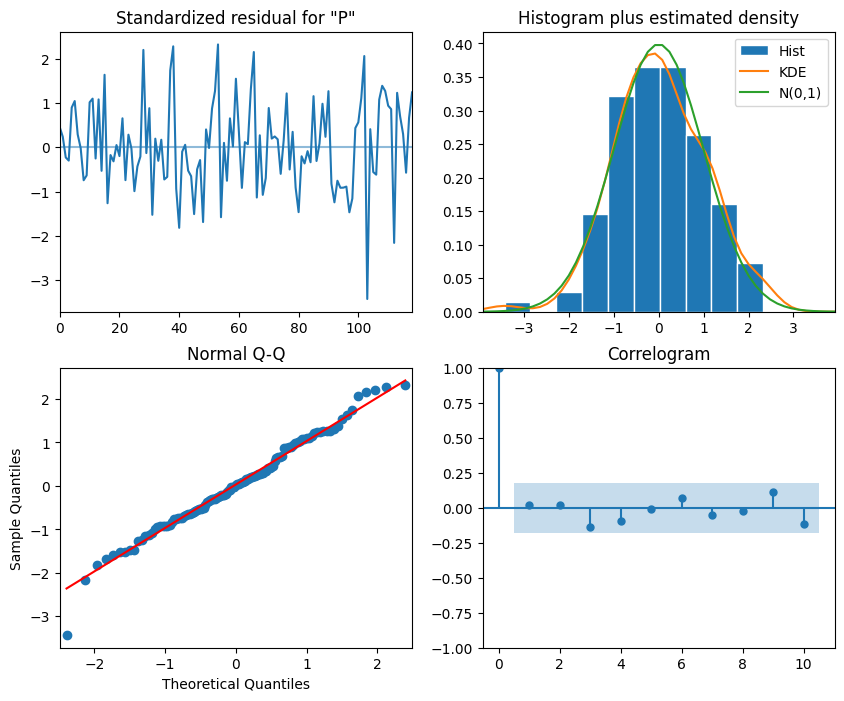

In [27]:
# Pg 174
# Figure 8.12 in pg 175

SARIMA_model_fit.plot_diagnostics(figsize=(10,8))

plt.savefig('figures/CH08_F12_peixeiro.png', dpi=300)

In [28]:
# DEPRECATED

# residuals = SARIMA_model_fit.resid

# lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

# print(pvalue)

In [29]:
# Pg 174

residuals = SARIMA_model_fit.resid

lb_dataframe = acorr_ljungbox(residuals, np.arange(1, 11, 1))

lb_dataframe

,lb_stat,lb_pvalue
1,0.004926,0.944045
2,0.745428,0.688862
3,1.021910,0.795951
4,1.226578,0.873704
5,1.436046,0.920330
6,1.712260,0.944171
7,2.308635,0.940805
8,2.718543,0.950761
9,2.735048,0.973880
10,4.969808,0.893186


In [30]:
# Pg 175

SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Month,Passengers,naive_seasonal,ARIMA_pred,SARIMA_pred
132,1960-01,417,360,422.296673,418.509328
133,1960-02,391,342,410.648638,399.566885
134,1960-03,419,406,461.831648,461.297826
135,1960-04,461,396,457.747204,451.420985
136,1960-05,472,420,481.624050,473.727669
137,1960-06,535,472,530.982683,538.777825
138,1960-07,622,548,606.129696,612.457112
139,1960-08,606,559,615.429372,624.636615
140,1960-09,508,463,525.641430,520.164520
141,1960-10,461,407,467.170965,462.831533


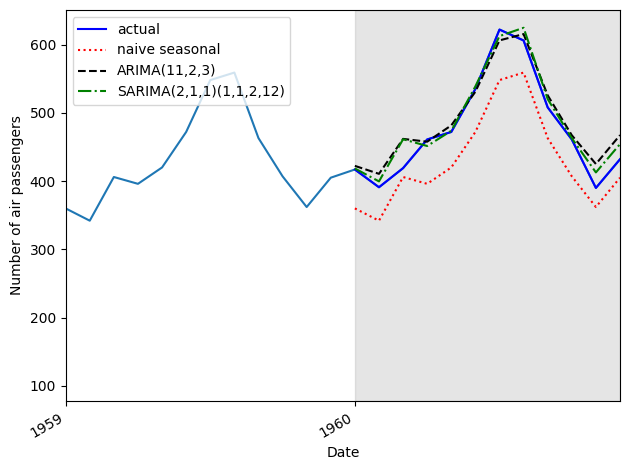

In [31]:
# Figure 8.13 in pg 176

fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.plot(test['Passengers'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(11,2,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')

ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
ax.set_xlim(120, 143)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F13_peixeiro.png', dpi=300)

In [32]:
# Pg 177
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
# Pg 177
mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal'])
mape_ARIMA = mape(test['Passengers'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Passengers'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_ARIMA, mape_SARIMA)

9.987532920823485 3.8413659280356205 2.846914279165138


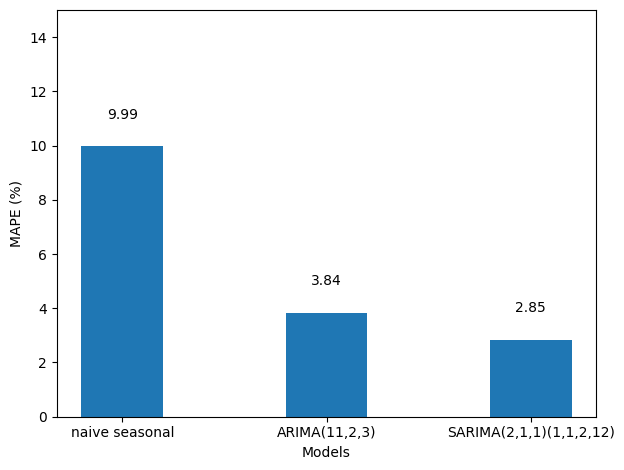

In [34]:
# Figure 8.14 in pg 177

fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(11,2,3)', 'SARIMA(2,1,1)(1,1,2,12)']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH08_F14_peixeiro.png', dpi=300)

SARIMA 2.85% off vs ARIMA 3.84% off